In [3]:
import pandas as pd

pizza = {'diameter': [6,8,10,14,18],
        'harga': [7,9,13,17.5,18]}

df = pd.DataFrame(pizza)
df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


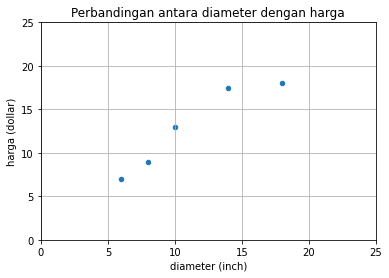

In [24]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='diameter', y='harga')
plt.title('Perbandingan antara diameter dengan harga')
plt.xlabel('diameter (inch)')
plt.ylabel('harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid()
plt.show()


In [32]:
import numpy as np

X = np.array(df['diameter']) # features
y = np.array(df['harga']) # target

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [66]:
# kita reshape agar dapat kita manipulasi struktur data nya menjadi vertikal yang sebelumnya adalah horizontal (2 dimensi)
# model machine learning membutuhkan data yang 2 dimensi

X = X.reshape(-1, 1)
X.shape

(5, 1)

In [67]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [71]:
# training model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [76]:
X_vis = np.array([0,25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

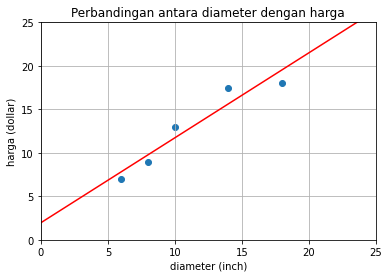

In [77]:
plt.scatter(X,y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan antara diameter dengan harga')
plt.xlabel('diameter (inch)')
plt.ylabel('harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid()
plt.show()

#formula dari linear regression. y = alpha + beta x
# y = response variabel (variabel target)
# x = explanatory variabel (features)
# alpha = intercept (nilai pada sumbu y ketika sumbu x nya bernilai 0)
# beta = slope (nilai slope berpengaruh kepada tingkat kemiringan garis linear. nilai 0 slope membuat kemiringan horizontal)


In [80]:
# untuk melihat nilai intercept(alpha) dan slope(beta)
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


In [83]:
# mencari nilai slope/beta = covariance(x,y) / variance(x)
print(f'X:\n{X}\n')
# merubah dimensi dari yang 2 dimensi menjadi 1 dimensi kembali menggunakan method flatten
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


In [84]:
# mencari nilai variance
# ddof adalah degrees of fredom yang didapat dari nilai n - 1
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 23.2


In [87]:
# mencari nilai covariance
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [88]:
# mengambil nilai yang berada di index 0 dan kolom 1
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'covariance : {covariance_xy}')

covariance : 22.65


In [91]:
slope = covariance_xy / variance_x
print(f'slope : {slope}')
# hasilnya sama persis dengan kita menggunakan method coef (method untuk menampilkan slope)

slope : 0.9762931034482758


In [94]:
# mencari nilai dari intercept
# formulanya alpha = mean dari variabel target (y) - slope/beta * mean dari features (x)
intercept = np.mean(y) - slope * np.mean(X)
print(f'intercept: {intercept}')

intercept: 1.9655172413793114


In [95]:
# prediksi harga pizza
diameter_pizza = np.array([12,20,23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [96]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [100]:
for dmt, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diamter : {dmt} - prediksi harga : {hrg}')

Diamter : [12] - prediksi harga : 13.681034482758621
Diamter : [20] - prediksi harga : 21.491379310344826
Diamter : [23] - prediksi harga : 24.42025862068965


In [108]:
# Evaluasi simple linear regression
X_train = np.array([6,8,10,14,18]).reshape(-1, 1)
y_train = np.array([7,9,13,17.5,18])

X_test = np.array([8,9,11,16,12]).reshape(-1,1)
y_test = np.array([11, 8.5, 15,18,11])

In [109]:
# training simple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
# evaluasi linear regression dengan koefisien of determinan atau R-squared(R-kuadrat)
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-Squared : {r_squared}')

R-Squared : 0.6620052929422553


In [111]:
# mencari nilai R-Squared secara manual
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
             for x_i, y_i in zip(X_test, y_test)])

print(f'Sum square residual : {ss_res}')

Sum square residual : 19.1980993608799


In [112]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'Sum square total : {ss_tot}')

Sum square total : 56.8


In [113]:
# R-squared = 1 - (ss_res / ss_tot)
r_squared = 1 - (ss_res / ss_tot)
print(f'R-Squared : {r_squared}')

R-Squared : 0.6620052929422553
